In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import math

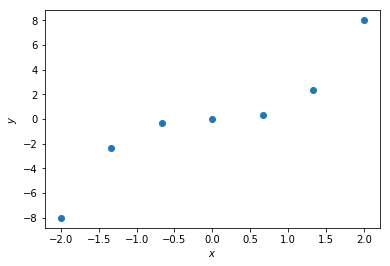

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3 # original dependecy 

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

In [3]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor( random_state=17)

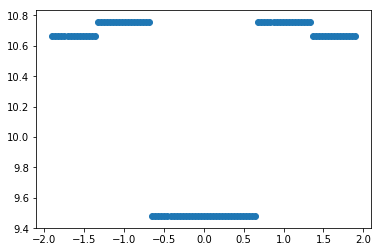

In [37]:
X = np.linspace(-2, 2, 7)
y = X ** 3
def D(X, y):
    result = 0
    for j in range(len(X)):
        temp = sum(y) / len(X)
        result += (y[j] - temp)**2
    
    return result / len(X)
def regression_var_criterion(X, y, t):
    XL = X[X >= t]
    YL = y[X >= t]
    XR = X[X < t]
    YR = y[X < t]
    Q = D(X, y) - (len(XL) / len(X)) * D(XL, YL) - (len(XR) / len(X)) * D(XR, YR)
    
    return Q
interval = np.linspace(-1.9, 1.9, 101)
Q = [regression_var_criterion(X, y, t) for t in interval]

plt.scatter(interval, Q)

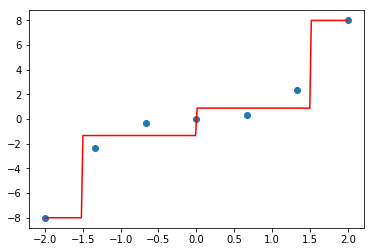

In [38]:
xx = np.linspace(-2, 2, 200)

def prediction(x, X, y):
    if x >= 1.5:
        return np.mean(y[X >= 1.5])
    elif x < 1.5 and x >= 0:
        return np.mean(y[(X >= 0) & (X < 1.5)])
    elif x >= -1.5 and x < 0:
        return np.mean(y[(X < 0) & (X >= -1.5)])
    else:
        return np.mean(y[X < -1.5])
    
    
predictions = [prediction(x, X, y) for x in xx]

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y);
plt.plot(xx, predictions, c='red');


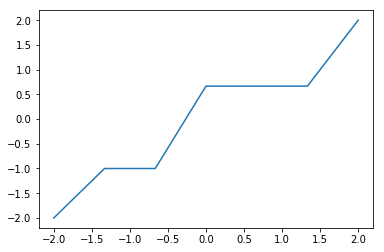

In [39]:

left_i = X < 0
right_i = ~left_i

left_left_i = (X < -1.5) & left_i
right_left_i = ~left_left_i & left_i

left_right_i = (X < 1.5) & right_i
right_right_i = ~left_right_i & right_i

preds = np.ones_like(X)
preds[left_left_i] *= X[left_left_i].mean()
preds[right_left_i] *= X[right_left_i].mean()
preds[left_right_i] *= X[left_right_i].mean()
preds[right_right_i] *= X[right_right_i].mean()

plt.plot(X, preds)
plt.show()